<a href="https://colab.research.google.com/github/sfatimazahra/ML-Image-Classification-using-CIFAR-100/blob/main/TransferLearningResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules


In [ ]:
!pip install --upgrade tensorflow


In [3]:
# Import Keras modules and its important APIs
import keras
from keras.optimizers import Adam
from keras import backend as K
from keras.models import Model
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.applications.resnet50 import ResNet50



Defining classes


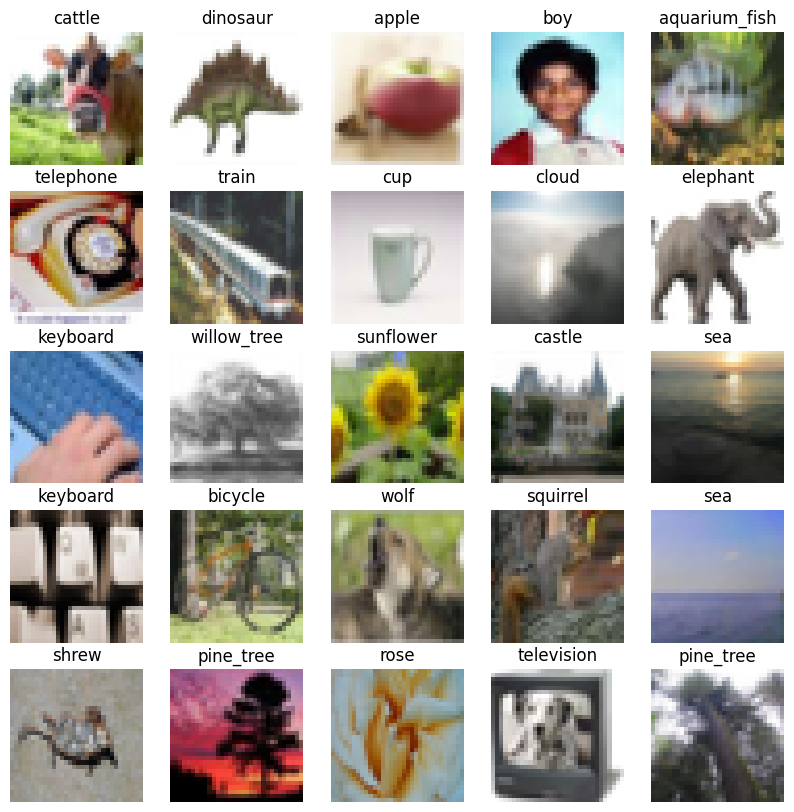

(32, 32, 3)


In [ ]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()


# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Map class indices to class names
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.show()
print(x_train[0].shape)



Preprocessing input data to make it compatible with ResNet50

Defining Model

In [ ]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from skimage import transform

# Assuming x_train, y_train, x_test, y_test are your training and testing data

# Set the input shape for your model
input_shape = x_train[0].shape
num_classes = 100

# Define and compile the model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape, classes=100)
base_model.trainable = False

# Build the classification model on top of the backbone
model = Sequential([
    base_model,
    Flatten(),
    Dense(num_classes, activation='softmax')  # Keep num_classes as 100
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model from scratch
history_scratch = model.fit(
    x_train, y_train,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model and report the best test accuracy
best_test_accuracy_scratch = max(history_scratch.history['val_accuracy'])
print(f'Best Test Accuracy (Training from Scratch): {best_test_accuracy_scratch}')


# ***Trying for better accuracy -> ehti***

Data loading

169001437/169001437 [==============================] - 3s 0us/step


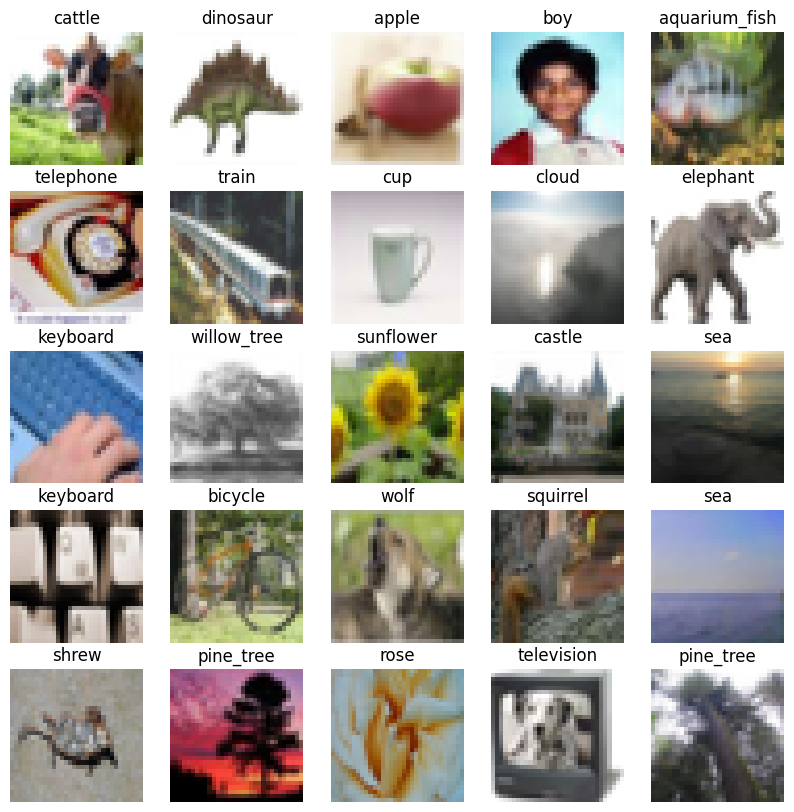

(32, 32, 3)


In [4]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Map class indices to class names
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.show()
print(x_train[0].shape)



Data Augmentation (on a single image)

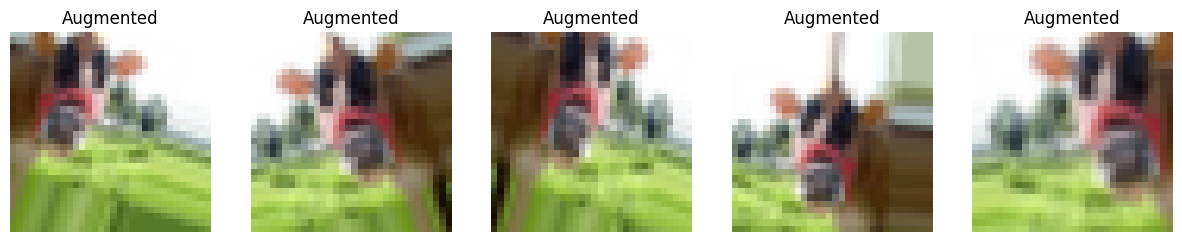

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of applying augmentation to one image
img = x_train[0]
img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels) for flow method

# Generate augmented images
augmented_images = []
for batch in datagen.flow(img, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) >= 5:  # Generate 5 augmented images for demonstration
        break

# Display the augmented images
plt.figure(figsize=(15, 3))
for i, augmented_img in enumerate(augmented_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.uint8(augmented_img))
    plt.title('Augmented')
    plt.axis('off')

plt.show()

Data Augmentation on Entire Dataset

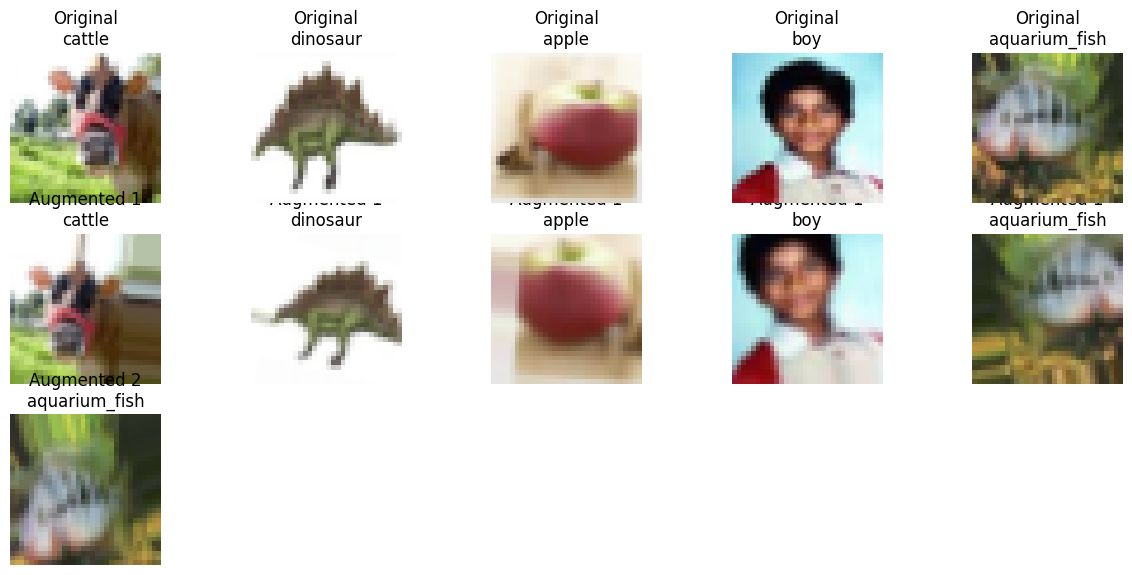

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment the entire training dataset
augmented_images = []
augmented_labels = []
for i in range(x_train.shape[0]):
    img = x_train[i]
    img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels) for flow method

    # Generate 3 augmented images per original image
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(y_train[i])

        if len(augmented_images) % 3 == 0:
            break  # Break after generating 3 augmented images per original image

# Convert the augmented images and labels lists to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Normalize the entire dataset
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255
augmented_images_normalized = augmented_images.astype('float32') / 255


# Display a few original and augmented normalized images
plt.figure(figsize=(15, 9))
for i in range(5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train_normalized[i])
    plt.title(f'Original\n{class_names[y_train[i][0]]}')
    plt.axis('off')

    for j in range(2):
        plt.subplot(4, 5, i + j + 6)
        plt.imshow(augmented_images_normalized[i * 3 + j])
        plt.title(f'Augmented {j+1}\n{class_names[augmented_labels[i * 3 + j][0]]}')
        plt.axis('off')

plt.show()


In [7]:
print('Dataset before augmentation: ', len(x_train))
print('Labels before augmentation: ', len(y_train))
print('Dataset after augmentation: ', len(augmented_images))
print('Labels after augmentation: ', len(augmented_labels))

Dataset before augmentation:  50000
Labels before augmentation:  50000
Dataset after augmentation:  150000
Labels after augmentation:  150000


Model

In [8]:
from keras.applications import ResNet50
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from skimage import transform

# Assuming x_train, y_train, x_test, y_test are your training and testing data

# Set the input shape for your model
# input_shape = x_train[0].shape
input_shape = augmented_images_normalized[0].shape

num_classes = 100

# Define and compile the model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape, classes=100)
# base_model.trainable = False


# Build the classification model on top of the backbone
model = Sequential([
    base_model,
    Flatten(),
    Dense(num_classes, activation='softmax')  # Keep num_classes as 100
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model from scratch
history_scratch = model.fit(
    augmented_images, augmented_labels,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate the model and report the best test accuracy
best_test_accuracy_scratch = max(history_scratch.history['val_accuracy'])
print(f'Best Test Accuracy (Training from Scratch): {best_test_accuracy_scratch}')


94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/50
4688/4688 [==============================] - ETA: 0s - loss: 4.2457 - accuracy: 0.0767

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4688/4688 [==============================] - 242s 44ms/step - loss: 4.2457 - accuracy: 0.0767 - val_loss: 3.6013 - val_accuracy: 0.1404
Epoch 2/50
4688/4688 [==============================] - 204s 44ms/step - loss: 3.2874 - accuracy: 0.1921 - val_loss: 3.8446 - val_accuracy: 0.1763
Epoch 3/50
4688/4688 [==============================] - 200s 43ms/step - loss: 2.9147 - accuracy: 0.2587 - val_loss: 3.4658 - val_accuracy: 0.2106
Epoch 4/50
4688/4688 [==============================] - 205s 44ms/step - loss: 2.6862 - accuracy: 0.3057 - val_loss: 3.7563 - val_accuracy: 0.2080
Epoch 5/50
4688/4688 [==============================] - 210s 45ms/step - loss: 2.4523 - accuracy: 0.3517 - val_loss: 3.5633 - val_accuracy: 0.2602
Epoch 6/50
4688/4688 [==============================] - 204s 44ms/step - loss: 2.2771 - accuracy: 0.3907 - val_loss: 2.9167 - val_accuracy: 0.3284
Epoch 7/50
4688/4688 [==============================] - 203s 43ms/step - loss: 2.1437 - accuracy: 0.4196 - val_loss: 2.7698 - val

Plotting

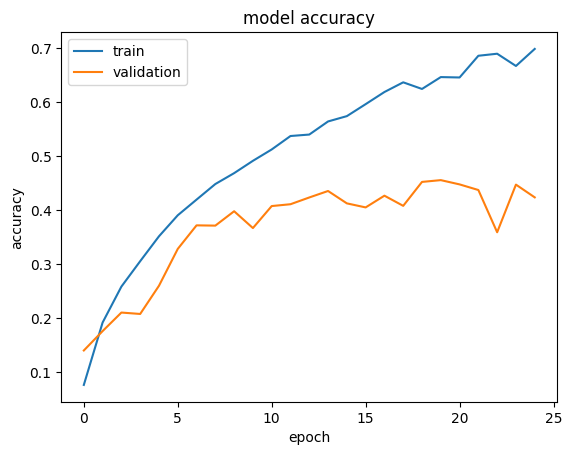

In [9]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(history_scratch)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
Total params: 23792612 (90.76 MB)
Trainable params: 23739492 (90.56 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


# DenseNet121 model by dani (used by ehti)

In [ ]:
# Define the DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.compile(optimizer= Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6) #Reduces learning rate when no improvment in validation loss
early_stopping = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True) #Stops when we see no improvement

model.summary()

epochs = 60
batch_size = 128

history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val, y_val),
                    epochs= epochs,
                    batch_size= batch_size,
                    callbacks=[lr_scheduler, early_stopping]
                    )

test_loss, test_accuracy = model.evaluate(x_test, y_test)

Retraining RESNET 50 with image augmentation, batch normalization and shuffling


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.datasets import cifar100

from keras.applications import EfficientNetB0

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

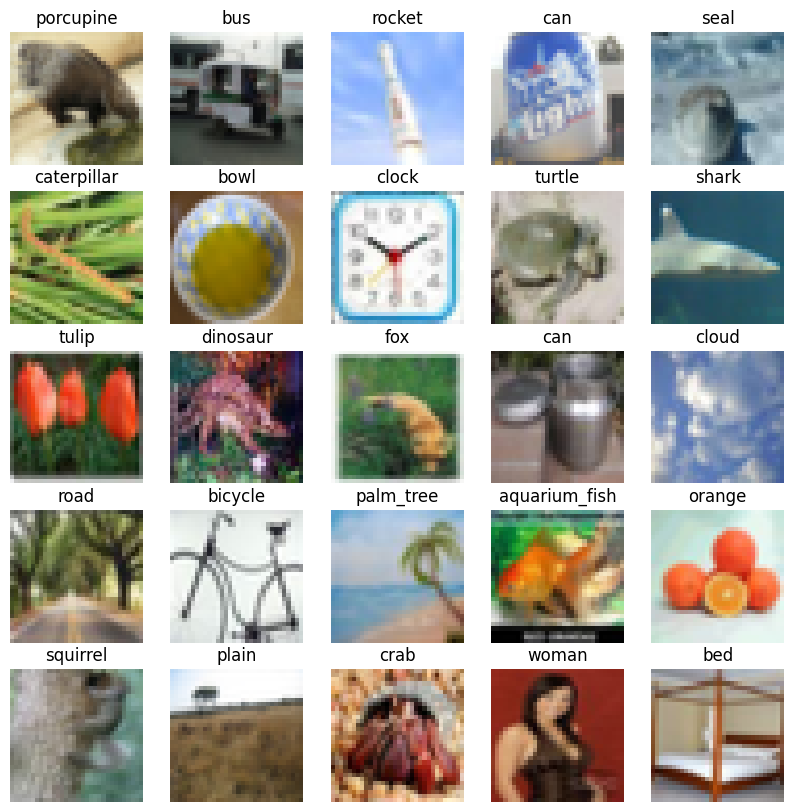

(32, 32, 3)


In [ ]:
from sklearn.model_selection import train_test_split

batch_size = 128
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# # Set a fixed seed for reproducibility
# seed = 42

# # Shuffle the training data with a fixed seed
# np.random.seed(seed)
# indices = np.arange(len(x_train))
# np.random.shuffle(indices)

# x_train = x_train[indices]
# y_train = y_train[indices]

# Split  into validation and test sets
x_testnew, x_val, y_testnew, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)


# Map class indices to class names
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house',
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew',
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')

plt.show()
print(x_train[0].shape)


Image Augmentation

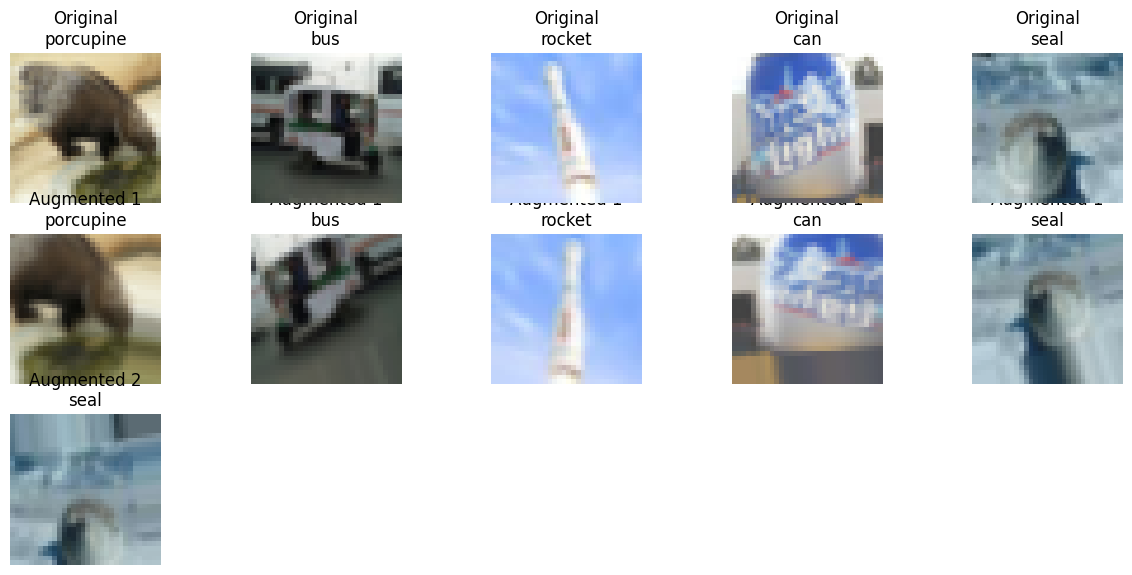

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Augment the entire training dataset
augmented_images = []
augmented_labels = []
for i in range(x_train.shape[0]):
    img = x_train[i]
    img = img.reshape((1,) + img.shape)  # Reshape to (1, height, width, channels) for flow method

    # Generate 3 augmented images per original image
    for batch in datagen.flow(img, batch_size=1):
        augmented_images.append(batch[0])
        augmented_labels.append(y_train[i])

        if len(augmented_images) % 3 == 0:
            break  # Break after generating 3 augmented images per original image

# Convert the augmented images and labels lists to NumPy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Normalize the entire dataset
x_train_normalized = x_train.astype('float32') / 255
x_test_normalized = x_test.astype('float32') / 255
augmented_images_normalized = augmented_images.astype('float32') / 255


# Display a few original and augmented normalized images
plt.figure(figsize=(15, 9))
for i in range(5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train_normalized[i])
    plt.title(f'Original\n{class_names[y_train[i][0]]}')
    plt.axis('off')

    for j in range(2):
        plt.subplot(4, 5, i + j + 6)
        plt.imshow(augmented_images_normalized[i * 3 + j])
        plt.title(f'Augmented {j+1}\n{class_names[augmented_labels[i * 3 + j][0]]}')
        plt.axis('off')

plt.show()


Model

In [ ]:
# Set the input shape for your model
input_shape = augmented_images_normalized[0].shape
num_classes = 100

# Define and compile the model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape, classes=100)
base_model.trainable = False


# Build the classification model on top of the backbone
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  # Add your own layers as needed
    BatchNormalization(),
    Activation('relu'),
    Flatten(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Train the model from scratch
history_scratch = model.fit(
    augmented_images_normalized, augmented_labels,
    epochs= 25,  # Adjust the number of epochs as needed
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)
# unaugmented
# history_scratch = model.fit(
#     x_train, y_train,
#     epochs=50,  # Adjust the number of epochs as needed
#     validation_data=(x_val, y_val),
#     callbacks=[early_stopping, model_checkpoint]
# )

# Evaluate the model and report the best test accuracy
best_test_accuracy_scratch = max(history_scratch.history['val_accuracy'])
print(f'Best Test Accuracy (Training from Scratch): {best_test_accuracy_scratch}')


Epoch 1/25
4688/4688 [==============================] - ETA: 0s - loss: 4.0373 - accuracy: 0.0922

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4688/4688 [==============================] - 67s 13ms/step - loss: 4.0373 - accuracy: 0.0922 - val_loss: 163.3970 - val_accuracy: 0.0128
Epoch 2/25
4688/4688 [==============================] - 54s 12ms/step - loss: 3.7836 - accuracy: 0.1302 - val_loss: 202.4860 - val_accuracy: 0.0110
Epoch 3/25
4688/4688 [==============================] - 55s 12ms/step - loss: 3.7161 - accuracy: 0.1423 - val_loss: 258.5402 - val_accuracy: 0.0104
Epoch 4/25
4688/4688 [==============================] - 55s 12ms/step - loss: 3.6805 - accuracy: 0.1458 - val_loss: 287.9207 - val_accuracy: 0.0092
Epoch 5/25
4688/4688 [==============================] - 55s 12ms/step - loss: 3.6529 - accuracy: 0.1518 - val_loss: 309.3637 - val_accuracy: 0.0080
Epoch 6/25
4688/4688 [==============================] - 56s 12ms/step - loss: 3.6371 - accuracy: 0.1536 - val_loss: 345.8030 - val_accuracy: 0.0124
Best Test Accuracy (Training from Scratch): 0.012799999676644802
